### Quantile Regression with Statsmodels

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


##### Least Absolute Deviation

In [4]:
model = smf.quantreg('foodexp~income', data)
res = model.fit(q=0.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Thu, 09 May 2024   No. Observations:                  235
Time:                        12:22:47   Df Residuals:                      233
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586
==============================================================================

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Visualize results

In [8]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = model.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + res.conf_int().loc['income'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])

ols = smf.ols('foodexp~income', data).fit()
ols_ci = ols.conf_int().loc['income'].tolist()
ols_dict = dict(a=ols.params['Intercept'],
                b=ols.params['income'],
                lb = ols_ci[0],
                ub = ols_ci[1])
print(models)
print(ols_dict)

      q           a         b        lb        ub
0  0.05  124.880096  0.343361  0.268632  0.418090
1  0.15  111.693660  0.423708  0.382780  0.464636
2  0.25   95.483539  0.474103  0.439900  0.508306
3  0.35  105.841294  0.488901  0.457759  0.520043
4  0.45   81.083647  0.552428  0.525021  0.579835
5  0.55   89.661370  0.565601  0.540955  0.590247
6  0.65   74.033434  0.604576  0.582169  0.626982
7  0.75   62.396584  0.644014  0.622411  0.665617
8  0.85   52.272216  0.677603  0.657383  0.697823
9  0.95   64.103964  0.709069  0.687831  0.730306
{'a': 147.47538852370573, 'b': 0.48517842367692354, 'lb': 0.4568738130184233, 'ub': 0.5134830343354237}


##### First plot
- Best fit line for 10 quantile regression models to the least squares fit. 

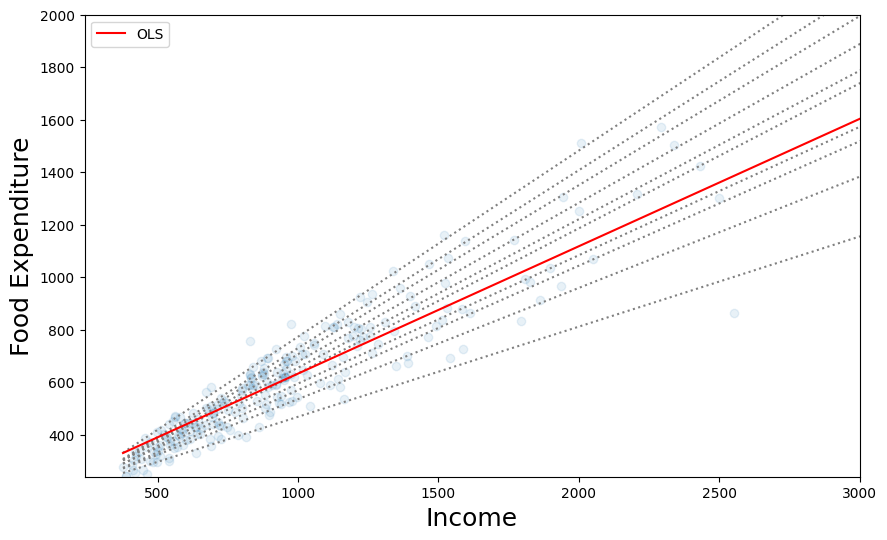

In [14]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(10,6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols_dict['a'], ols_dict['b'])
ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.income, data.foodexp, alpha=0.1)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('Income', fontsize=18)
ax.set_ylabel('Food Expenditure', fontsize=18)
plt.show()

/home/johnadi/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


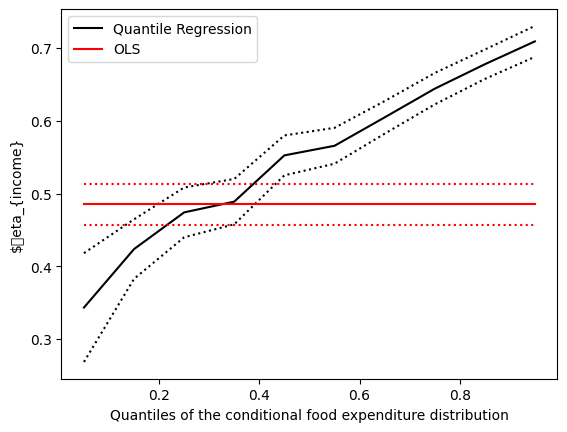

In [18]:
n = models.shape[0]
# Quantile Regression
p1 = plt.plot(models.q, models.b, color="black", label="Quantile Regression")
p2 = plt.plot(models.q, models.ub, linestyle="dotted", color="black")
p3 = plt.plot(models.q, models.lb, linestyle="dotted", color="black")
# OLS Regression 
p4 = plt.plot(models.q, [ols_dict['b']] * n, color="red", label="OLS")
p5 = plt.plot(models.q, [ols_dict['lb']] * n, color="red", linestyle="dotted")
p6 = plt.plot(models.q, [ols_dict['ub']] * n, color="red", linestyle="dotted")
plt.ylabel('$\beta_{income}')
plt.xlabel("Quantiles of the conditional food expenditure distribution")
plt.legend()
plt.show()